In [1]:
!python -V

Python 3.9.12


In [2]:
!pip check


spyder 5.1.5 has requirement pyqt5<5.13, but you have pyqt5 5.15.11.
spyder 5.1.5 has requirement pyqtwebengine<5.13, but you have pyqtwebengine 5.15.7.
jupyter-server 1.13.5 has requirement anyio<4,>=3.1.0, but you have anyio 4.9.0.
google-cloud-storage 1.31.0 has requirement google-auth<2.0dev,>=1.11.0, but you have google-auth 2.40.1.
google-cloud-core 1.7.1 has requirement google-auth<2.0dev,>=1.24.0, but you have google-auth 2.40.1.
google-api-core 1.25.1 has requirement google-auth<2.0dev,>=1.21.1, but you have google-auth 2.40.1.
flake8 3.9.2 has requirement pycodestyle<2.8.0,>=2.7.0, but you have pycodestyle 2.8.0.
daal4py 2021.5.0 has requirement daal==2021.4.0, but you have daal 2025.5.0.


In [3]:
! pip install pyqt5 pyqtwebengine daal pathlib ruamel-yaml pycodestyle==2.8.0


In [4]:
! pip install --ignore-installed tbb


  Using cached tbb-2022.1.0-py2.py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
  Using cached tcmlib-1.3.0-py2.py3-none-manylinux_2_28_x86_64.whl (4.2 MB)


In [5]:
import pandas as pd

In [7]:
import pickle

In [8]:
pd.__version__

'1.4.2'

In [7]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [8]:
!pip install pyarrow

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [2]:
import sklearn

In [4]:
sklearn.__version__

'1.0.2'

In [1]:
# import packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("taxi-duration-prediction")

# Q1: 
Download the data for January and February 2023.

Read the data for January. How many columns are there?

In [6]:
# get data
jan_data = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
feb_data = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')


In [7]:
jan_data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
feb_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [13]:
# columns are in January data
print(f"There are {jan_data.shape[1]} columns in January data")

# or
print(f"There are {len(jan_data.columns)} columns in January data")

There are 19 columns in January data
There are 19 columns in January data


In [10]:
# columns are in February data
print(f"There are {feb_data.shape[1]} columns in February data")

#or
print(f"There are {len(feb_data.columns)} columns in February data")

There are 19 columns in February data
There are 19 columns in February data


# Q2

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [11]:
jan_data.tpep_dropoff_datetime.dtypes

dtype('<M8[ns]')

In [7]:
jan_data['duration'] = jan_data.tpep_dropoff_datetime - jan_data.tpep_pickup_datetime
jan_data['duration'] = jan_data.duration.apply(lambda total_time: total_time.total_seconds() / 60)

# feb_data

feb_data['duration'] = feb_data.tpep_dropoff_datetime - feb_data.tpep_pickup_datetime
feb_data['duration'] = feb_data.duration.apply(lambda total_time: total_time.total_seconds() / 60)

In [14]:
jan_data['duration']

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

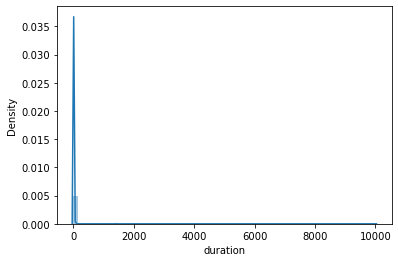

In [15]:
sns.distplot(jan_data['duration'])

In [8]:
print("The standard deviation of the trips duration in January is {:.2f}".format(jan_data.duration.std()))

The standard deviation of the trips duration in January is 42.59


# Q3
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [9]:
amount_of_data_with_outliers = len(jan_data.duration)
print(amount_of_data_with_outliers)
clean_jan_data = jan_data[(1<=jan_data.duration)&(jan_data.duration<=60)]
# feb
clean_feb_data = feb_data[(1<=feb_data.duration)&(feb_data.duration<=60)]

amount_of_data_wo_outliers = len(clean_jan_data)
print(amount_of_data_wo_outliers)

3066766
3009173


<AxesSubplot:xlabel='duration', ylabel='Density'>

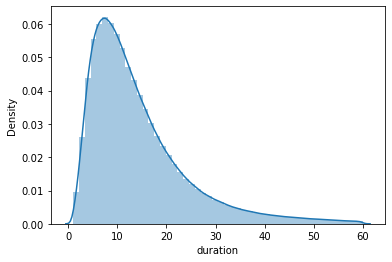

In [19]:
sns.distplot(clean_jan_data.duration)

In [10]:
print("Fraction of the records left after dropping the outliers is {:.0%}".format(amount_of_data_wo_outliers/amount_of_data_with_outliers))

Fraction of the records left after dropping the outliers is 98%


# Q4
One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [22]:
clean_jan_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [10]:
categorical = ['PULocationID', 'DOLocationID']

In [11]:
clean_jan_data[categorical] = clean_jan_data[categorical].astype(str)
clean_feb_data[categorical] = clean_feb_data[categorical].astype(str)

In [ ]:
clean_jan_data[categorical].dtypes

In [12]:
jan_train_dicts = clean_jan_data[categorical].to_dict(orient='records')
feb_train_dicts = clean_feb_data[categorical].to_dict(orient='records')

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(jan_train_dicts)
X_val = dv.transform(feb_train_dicts)

In [ ]:
X_train.shape

# Q5
Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [1]:
target = 'duration'
y_train = clean_jan_data[target].values

NameError: name 'clean_jan_data' is not defined

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual value')
plt.legend()

In [ ]:
mean_squared_error(y_train, y_pred, squared=False)

# Q6
Evaluating the model
Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [2]:
y_val = clean_feb_data[target].values
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

NameError: name 'clean_feb_data' is not defined

In [1]:
# import packages
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("taxi-duration-prediction")

<Experiment: artifact_location='/workspaces/mlops-zoomcamp-2025/02-experiment-tracking/mlruns/1', creation_time=1747246172013, experiment_id='1', last_update_time=1747246172013, lifecycle_stage='active', name='taxi-duration-prediction', tags={}>

In [2]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [ ]:
#Loading data
categorical = ['PULocationID', 'DOLocationID']
filename_jan = './data/yellow_tripdata_2023-01.parquet'
clean_jan_data = read_dataframe(filename_jan)

filename_feb = './data/yellow_tripdata_2023-02.parquet'
clean_feb_data = read_dataframe(filename_feb)

jan_train_dicts = clean_jan_data[categorical].to_dict(orient='records')
feb_train_dicts = clean_feb_data[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(jan_train_dicts)
print(X_train.shape)

target = 'duration'
y_train = clean_jan_data[target].values

X_val = dv.transform(feb_train_dicts)


y_val = clean_feb_data[target].values

In [ ]:
#Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error on validation set is: {rmse}")

y_pred = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Error on train set is: {rmse_train}")


In [ ]:
with mlflow.start_run():
    
    mlflow.set_tag("developer", "galchenkova")
    
    mlflow.log_param("train-data-path", "./data/yellow_tripdata_2023-01.parquet")
    mlflow.log_param("valid-data-path", "./data/yellow_tripdata_2023-02.parquet")
    
    alpha = 0.05
    mlflow.log_param("alpha", alpha)
    #Lasso model
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"Root Mean Squared Error on validation set is: {rmse}")
    mlflow.log_metric("rmse", rmse)
    
    y_pred = lr.predict(X_train)
    rmse_train = mean_squared_error(y_train, y_pred, squared=False)
    print(f"Root Mean Squared Error on train set is: {rmse_train}")
    mlflow.log_artifact(local_path="models/lin_reg.bin", artifact_path="models_pickle")

In [ ]:
import xgboost as xgb

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
        

In [ ]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [ ]:

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

mlflow.sklearn.autolog()

for model_class in (RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, LinearSVR):

    with mlflow.start_run():

        mlflow.log_param("train-data-path", "./data/green_tripdata_2021-01.csv")
        mlflow.log_param("valid-data-path", "./data/green_tripdata_2021-02.csv")
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

        mlmodel = model_class()
        mlmodel.fit(X_train, y_train)

        y_pred = mlmodel.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)
        

# Saving model

In [ ]:
! mkdir models

In [ ]:
import pickle
with open('models/lin_reg_model.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)